In [98]:
import pandas as pd
import numpy as np

bike_df = pd.read_csv('../data/city_bikes.csv')
total_df = pd.read_csv('../data/total_df.csv')

total_df['distance'].fillna(total_df['distance'].mean(), inplace=True)
total_df['rating'].fillna(total_df['rating'].mean(), inplace=True)
total_df['price'] = total_df['price'].astype('str').apply(lambda x: x.count('$')).astype('int')
total_df.replace(0, np.nan, inplace=True)
total_df['price'].fillna(total_df['price'].mean(), inplace=True)
total_df['review_count'].fillna(total_df['review_count'].mean(), inplace=True)
total_df['rating'].fillna(total_df['rating'].mean(), inplace=True)


total = total_df.isnull().sum().sort_values(ascending=False)
percent = (total_df.isnull().sum()/total_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

to_drop = missing_data.head(18).index.tolist()
total_df.drop(to_drop, axis=1, inplace=True)

total = total_df.isnull().sum().sort_values(ascending=False)
percent = (total_df.isnull().sum()/total_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
image_url,1678,0.440999
phone,1521,0.399737
display_phone,1521,0.399737
location.address1,1425,0.374507
location.zip_code,1423,0.373982
id,1421,0.373456
coordinates.longitude,1421,0.373456
coordinates.latitude,1421,0.373456
alias,1421,0.373456
transactions,1421,0.373456


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [76]:
final_df = pd.merge(bike_df, total_df, how='outer', left_on=['latitude', 'longitude', 'name'], right_on=['station_lat', 'station_long', 'station_name'])
final_df.count()

empty_slots                 3894
free_bikes                  3894
id_x                        3894
latitude                    3894
longitude                   3894
name_x                      3894
timestamp                   3894
extra.ebikes                3894
extra.has_ebikes            3894
extra.last_updated          3894
extra.payment               3894
extra.payment-terminal      3894
extra.renting               3894
extra.returning             3894
extra.slots                 3894
extra.uid                   3894
id_y                        2384
alias                       2384
name_y                      3805
image_url                   2127
url                         2384
review_count                2101
categories                  3805
rating                      3522
transactions                2384
price                       3805
phone                       2284
display_phone               2284
distance                    3805
coordinates.latitude        2384
coordinate

In [25]:
total = final_df.isnull().sum().sort_values(ascending=True)
percent = (final_df.isnull().sum()/final_df.isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
empty_slots,0,0.000000
extra.uid,0,0.000000
extra.slots,0,0.000000
extra.renting,0,0.000000
extra.payment-terminal,0,0.000000
extra.payment,0,0.000000
extra.last_updated,0,0.000000
extra.has_ebikes,0,0.000000
extra.returning,0,0.000000
timestamp,0,0.000000


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

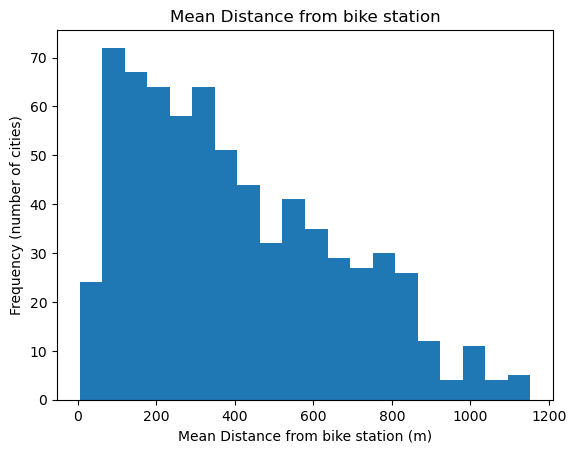

In [77]:
import matplotlib.pyplot as plt

distance_mean = final_df.groupby('station_name')['distance'].mean()
plt.hist(distance_mean, bins=20)
plt.title('Mean Distance from bike station')
plt.xlabel('Mean Distance from bike station (m)')
plt.ylabel('Frequency (number of stations)')
plt.show()

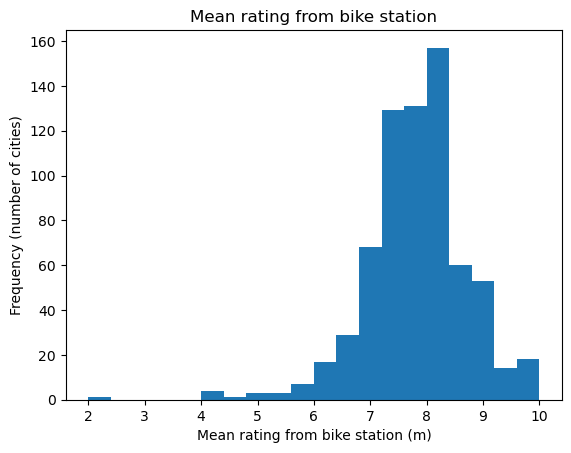

In [78]:
rating_mean = final_df.groupby('station_name')['rating'].mean()
plt.hist(rating_mean, bins=20)
plt.title('Mean rating from bike station')
plt.xlabel('Mean rating from bike station (m)')
plt.ylabel('Frequency (number of stations)')
plt.show()

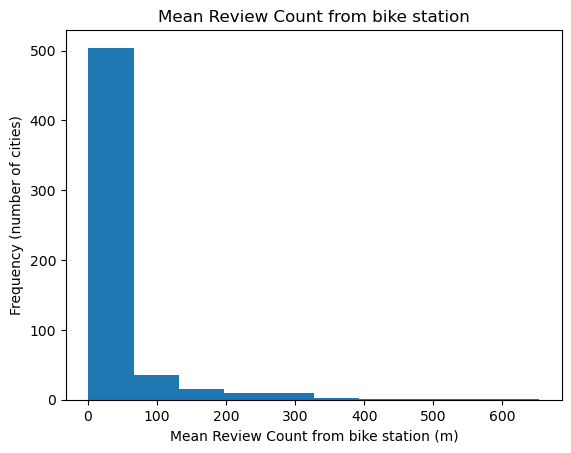

In [107]:
review_count_mean = final_df.groupby('station_name')['review_count'].mean()
plt.hist(review_count_mean, bins=10)
plt.title('Mean Review Count from bike station')
plt.xlabel('Mean Review Count from bike station (m)')
plt.ylabel('Frequency (number of stations)')
plt.show()

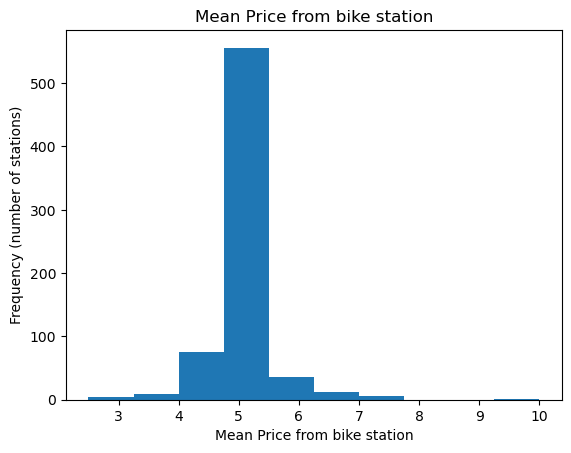

In [110]:
price_mean = final_df.groupby('station_name')['price'].mean().apply(lambda x: x*2.5)
plt.hist(price_mean, bins=10)
plt.title('Mean Price from bike station')
plt.xlabel('Mean Price from bike station')
plt.ylabel('Frequency (number of stations)')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [99]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [100]:
connection = create_connection('../db/data.db')

Connection to SQLite DB successful


In [101]:
station_keys = ['latitude', 'longitude', 'name', 'free_bikes', 'empty_slots']

drop_stations_table = """
    DROP TABLE IF EXISTS stations;
"""
create_stations_table = """
    CREATE TABLE IF NOT EXISTS stations (
        id INTEGER PRIMARY KEY,
        latitude REAL,
        longitude REAL,
        name TEXT,
        free_bikes INTEGER,
        empty_slots INTEGER
    );
"""

poi_keys = ['review_count', 'distance', 'rating', 'price', 'name', 'station_lat', 'station_long', 'station_name']
drop_poi_table = """
    DROP TABLE IF EXISTS poi;
"""
create_poi_table = """
    CREATE TABLE IF NOT EXISTS poi (
        id INTEGER PRIMARY KEY,
        review_count INTEGER,
        distance REAL,
        rating REAL,
        price REAL
    );
"""

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

# execute_query(connection, drop_stations_table)
# execute_query(connection, create_stations_table)
# execute_query(connection, drop_poi_table)
# execute_query(connection, create_poi_table)

In [102]:
bike_df = bike_df[station_keys]

execute_query(connection, drop_stations_table)
bike_df.to_sql('stations', con=connection, dtype={'index': 'INTEGER PRIMARY KEY AUTOINCREMENT'})
add_primary_key_query = """
ALTER TABLE `stations`
RENAME `index` TO `stationId`;
"""
execute_query(connection, add_primary_key_query)
bike_sql_df = pd.read_sql('SELECT * FROM stations', con=connection)
bike_sql_df.head()

Query executed successfully
Query executed successfully


,stationId,latitude,longitude,name,free_bikes,empty_slots
0,0,45.617500,-73.606011,Cégep Marie-Victorin,0,10
1,1,45.516926,-73.564257,Gare d'autocars de Montréal (Berri / Ontario),8,2
2,2,45.506176,-73.711186,Ateliers municipaux de St-Laurent (Cavendish /...,3,14
3,3,45.512994,-73.682498,Place Rodolphe-Rousseau (Gohier / Édouard-Laurin),8,17
4,4,45.514734,-73.691449,Centre des loisirs (Tassé / Grenet),7,6


In [103]:
data_df = total_df[poi_keys]

execute_query(connection, drop_poi_table)
data_df.to_sql('poi', connection, dtype={'index': 'INTEGER PRIMARY KEY AUTOINCREMENT'})
add_primary_key_query = """
ALTER TABLE `poi`
RENAME `index` TO `pointId`;
"""
execute_query(connection, add_primary_key_query)
create_station_id_query = """
ALTER TABLE `poi`
ADD COLUMN `stationId` INTEGER;
"""
add_station_id_query = """
UPDATE `poi`
SET `stationId` = stations.`stationId`
FROM `stations` WHERE `poi`.`station_name` = stations.`name`;
"""
def drop_column_from_table(table, column):
    drop_column_query = f"""
    ALTER TABLE `{table}`
    DROP COLUMN `{column}`;
    """
    execute_query(connection, drop_column_query)
execute_query(connection, create_station_id_query)
execute_query(connection, add_station_id_query)
drop_column_from_table('poi', 'station_name')
drop_column_from_table('poi', 'station_lat')
drop_column_from_table('poi', 'station_long')

data_sql_df = pd.read_sql_query('SELECT * FROM poi', connection)
data_sql_df.head()

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


,pointId,review_count,distance,rating,price,name,stationId
0,0,4.0,350.299502,10.0,2.02277,Elefanté,642
1,1,11.0,231.181530,10.0,2.02277,Resto Keela,721
2,2,7.0,443.975597,10.0,2.02277,Mama Khan,736
3,3,1.0,1195.394136,10.0,2.02277,Marché Al Amine,328
4,4,1.0,656.954672,10.0,2.02277,Bar Fullum,219


Look at the data before and after the join to validate your data.

In [91]:
final_sql_df = pd.read_sql_query('SELECT * FROM poi INNER JOIN stations on stations.stationId = poi.stationId', connection)
print("Total data from DB: " + str(len(final_sql_df)))
print("Total data from dataframe: " + str(len(final_df)))
final_sql_df.head()

Total data from DB: 3805
Total data from dataframe: 3894


,pointId,review_count,distance,rating,price,name,stationId,stationId,latitude,longitude,name,free_bikes,empty_slots
0,0,4.0,350.299502,10.0,2.02277,Elefanté,642,642,45.498370,-73.560556,Robert-Bourassa / St-Maurice,7,16
1,1,11.0,231.181530,10.0,2.02277,Resto Keela,721,721,45.516254,-73.552917,Wolfe / de la Gauchetière,3,12
2,2,7.0,443.975597,10.0,2.02277,Mama Khan,736,736,45.524236,-73.581552,Métro Mont-Royal (Utilités publiques / Rivard),11,18
3,3,1.0,1195.394136,10.0,2.02277,Marché Al Amine,328,328,45.580335,-73.684719,du Mans / des Alouettes,11,12
4,4,1.0,656.954672,10.0,2.02277,Bar Fullum,219,219,45.536363,-73.554212,de Rouen / Hogan,7,5
